# Bắt đầu

# 🧠 Xử lý dữ liệu bệnh Đái tháo đường

## 1️⃣ Định nghĩa vấn đề
Mục tiêu của bài toán là **phân loại bệnh nhân có mắc bệnh đái tháo đường hay không** dựa trên các chỉ số sức khỏe (Glucose, Huyết áp, BMI, Tuổi, Insulin, v.v.).


### 🧩 Input:
- Bộ dữ liệu `diabetes.csv` gồm các cột đặc trưng:
- `Pregnancies`: Số lần mang thai
- `Glucose`: Nồng độ đường huyết
- `BloodPressure`: Huyết áp (mm Hg)
- `SkinThickness`: Độ dày da (mm)
- `Insulin`: Lượng insulin trong huyết tương
- `BMI`: Chỉ số khối cơ thể
- `DiabetesPedigreeFunction`: Chỉ số di truyền liên quan đến bệnh đái tháo đường
- `Age`: Tuổi của bệnh nhân
- `Outcome`: Nhãn mục tiêu (1 = Có bệnh, 0 = Không bệnh)


### 🎯 Output:
- Dữ liệu đã được **làm sạch và chuẩn hóa**, bao gồm:
- Các file CSV:
- `X_train_scaled.csv` — đặc trưng tập huấn luyện đã chuẩn hóa
- `X_test_scaled.csv` — đặc trưng tập kiểm tra đã chuẩn hóa
- `y_train.csv` — nhãn huấn luyện
- `y_test.csv` — nhãn kiểm tra




📊 Kích thước dữ liệu: (768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64


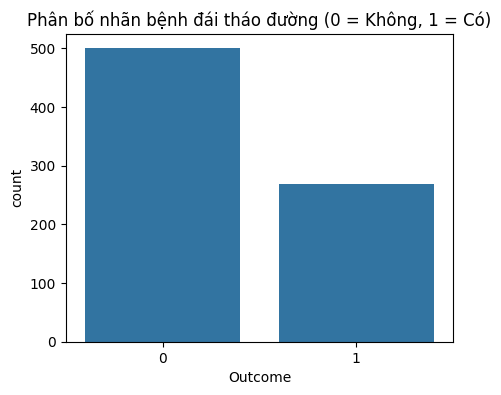

In [18]:
df = pd.read_csv('diabetes.csv')

print("📊 Kích thước dữ liệu:", df.shape)
print(df['Outcome'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df)
plt.title('Phân bố nhãn bệnh đái tháo đường (0 = Không, 1 = Có)')
plt.show()


## 2️⃣ Chuẩn bị vấn đề

### 2.1 Khai báo thư viện (Load Libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 2.2 Tham số chương trình

In [2]:
TEST_SIZE = 0.2
RANDOM_STATE = 42
SCALER_TYPE = 'StandardScaler'

### 2.3 Nạp dữ liệu( Load Dataset)

In [3]:
df = pd.read_csv('diabetes.csv')
print("\n✅ Dữ liệu gốc:")
print(df.head())


✅ Dữ liệu gốc:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 2.4 Chia sẻ dữ liệu thực nghiệm

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
import os

#### Gắn index cho dữ liệu

In [10]:
data = pd.read_csv("diabetes.csv")
data.reset_index(drop=True, inplace=True)
data["Index"] = data.index

#### Tách biến độc lập (X) và phụ thuộc (y)

In [11]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

#### Chia train/test (80/20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Số mẫu train: {X_train.shape[0]} mẫu")
print(f"Số mẫu test: {X_test.shape[0]} mẫu")

Số mẫu train: 614 mẫu
Số mẫu test: 154 mẫu


#### Tạo thư mục lưu

In [15]:
os.makedirs("processed_data", exist_ok=True)

#### Lưu dữ liệu CSV

In [16]:
X_train.to_csv("processed_data/X_train.csv", index=False)
X_test.to_csv("processed_data/X_test.csv", index=False)
y_train.to_csv("processed_data/y_train.csv", index=False)
y_test.to_csv("processed_data/y_test.csv", index=False)


#### Lưu dạng nén npz

In [17]:
np.savez(
    "processed_data/diabetes_data.npz",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

print("\n✅ Đã lưu dữ liệu chia nhỏ vào thư mục 'processed_data/'")


✅ Đã lưu dữ liệu chia nhỏ vào thư mục 'processed_data/'


#### Kiểm tra lại sau khi lưu

In [19]:
loaded = np.load("processed_data/diabetes_data.npz")
print("\n📊 Kiểm tra lại dữ liệu sau khi load:")
print("X_train:", loaded["X_train"].shape)
print("X_test :", loaded["X_test"].shape)
print("y_train:", loaded["y_train"].shape)
print("y_test :", loaded["y_test"].shape)


📊 Kiểm tra lại dữ liệu sau khi load:
X_train: (614, 9)
X_test : (154, 9)
y_train: (614,)
y_test : (154,)


## 4️⃣ Tiền xử lý dữ liệu

### 4.1 Kiểm tra và làm sạch dữ liệu (Data Cleaning)

In [20]:
# Thông tin tổng quan
df.info()

# Kiểm tra dữ liệu trùng lặp
duplicates = df.duplicated().sum()
print(f"Số dòng trùng lặp: {duplicates}")

# Xóa dữ liệu trùng
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Đã xóa dữ liệu trùng lặp")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Số dòng trùng lặp: 0


### 4.2 Kiểm tra giá trị thiếu hoặc 0 bất thường

In [21]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Số lượng giá trị bằng 0 trong các cột chính:")
print(df[cols_with_zero].eq(0).sum())


Số lượng giá trị bằng 0 trong các cột chính:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


### 4.3 Xử lý giá trị rỗng hoặc không hợp lệ

In [23]:
# Thay 0 bằng NaN để dễ xử lý
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Kiểm tra số lượng NaN
print("Số lượng giá trị NaN sau khi thay thế:")
print(df.isna().sum())

# Điền giá trị trung vị (median) cho các cột có NaN
for col in cols_with_zero:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("✅ Đã thay thế giá trị NaN bằng trung vị")


Số lượng giá trị NaN sau khi thay thế:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
✅ Đã thay thế giá trị NaN bằng trung vị


### 4.4 Kiểm tra lại dữ liệu sau khi xử lý

In [24]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

### 4.5 Biến đổi dữ liệu (ví dụ: chuẩn hóa phân phối hoặc tạo đặc trưng mới)

In [25]:
# Thêm cột mới: BMI phân loại (theo ngưỡng y học)
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[0, 18.5, 24.9, 29.9, 100],
                            labels=['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])

# Biến đổi logarithm cho Insulin để giảm độ lệch (skewness)
df['Log_Insulin'] = np.log1p(df['Insulin'])


### 4.6 Chuyển đổi dữ liệu (ví dụ: mã hóa nhãn nếu có biến phân loại)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
if 'BMI_Category' in df.columns:
    df['BMI_Category'] = le.fit_transform(df['BMI_Category'])


### 4.7 Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo bộ chuẩn hóa Min-Max
minmax_scaler = MinMaxScaler()

# Chuẩn hóa tất cả các cột số (trừ cột nhãn)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Outcome')

# Tạo bản sao dữ liệu
df_normalized = df.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df_normalized[num_cols])

print("✅ Đã chuẩn hóa dữ liệu bằng Min-Max (về khoảng [0, 1])")
print(df_normalized[num_cols].head())


✅ Đã chuẩn hóa dữ liệu bằng Min-Max (về khoảng [0, 1])
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2     0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  BMI_Category  Log_Insulin  
0                  0.234415  0.483333      0.000000     0.527619  
1                  0.116567  0.166667      1.000000     0.527619  
2                  0.253629  0.183333      0.333333     0.527619  
3                  0.038002  0.000000      1.000000     0.457607  
4                  0.943638  0.200000      0.000000     0.600411  


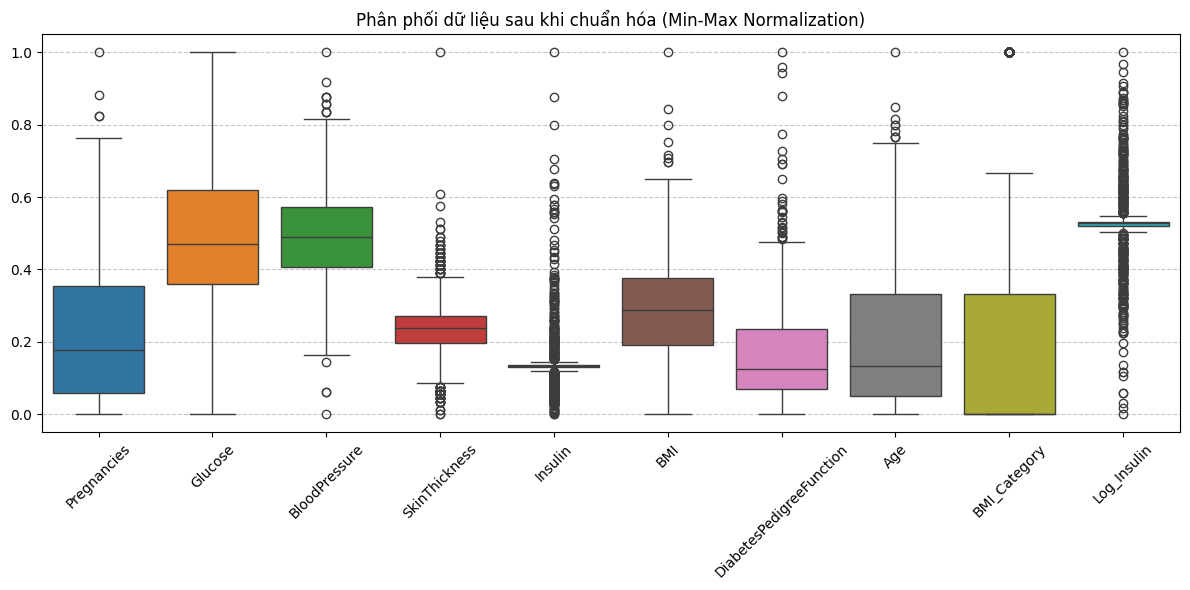

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách cột được chuẩn hóa
scale_columns = df_normalized.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

# Vẽ biểu đồ hộp (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_normalized[scale_columns])
plt.title("Phân phối dữ liệu sau khi chuẩn hóa (Min-Max Normalization)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 4.8 Chuyển đổi dữ liệu danh mục (Categorical Data) thành dạng One-Hot Encoding
Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

In [51]:
import pandas as pd
from IPython import display

# Giả sử df_normalized là dữ liệu sau khi chuẩn hóa
df_dataset = df_normalized.copy()

# 🔹 Lấy các cột kiểu object hoặc category
cat_cols = df_dataset.select_dtypes(include=['object', 'category']).columns
print("Các cột danh mục cần mã hóa:", list(cat_cols))

for col in cat_cols:
    print(f"\n👉 One-Hot Encoding cho cột: {col}")
    
    # Lấy danh sách nhãn (class names)
    class_names = df_dataset[col].unique()
    print("class_names:", class_names)
    
    # Tạo bảng one-hot
    df_onehot = pd.get_dummies(df_dataset[col])
    df_onehot = pd.DataFrame(df_onehot.values, columns=[f"{col}_{c}" for c in class_names])
    
    # Hiển thị bảng mã hóa
    display.display(df_onehot.head())


Các cột danh mục cần mã hóa: []


### 4.9 Lưu dữ liệu đã xử lý

In [ ]:
import os
os.makedirs("processed_data", exist_ok=True)

df_scaled.to_csv("processed_data/diabetes_processed.csv", index=False)
print("💾 Dữ liệu đã lưu vào: processed_data/diabetes_processed.csv")


💾 Dữ liệu đã lưu vào: processed_data/diabetes_processed.csv


## 5️⃣ Lưu dữ liệu Features (Input/Output)
Là bước cuối cùng của giai đoạn tiền xử lý trước khi đưa dữ liệu vào mô hình học máy.

In [52]:
import numpy as np

# 🧩 Xác định dữ liệu đầu vào (X) và đầu ra (y)
# Giả sử cột đầu ra là 'Outcome'
X_data = df.drop(columns=['Outcome']).values
y_data = df['Outcome'].values

print("✅ Kích thước dữ liệu đầu vào (X_data):", X_data.shape)
print("✅ Kích thước dữ liệu đầu ra (y_data):", y_data.shape)

# 🧠 Hiển thị 5 dòng đầu để kiểm tra
print("\n🔹 Dữ liệu đầu vào (X_data) mẫu:")
print(X_data[:5])
print("\n🔹 Dữ liệu đầu ra (y_data) mẫu:")
print(y_data[:5])

# 💾 Lưu dữ liệu sang file .npy (dạng NumPy)
np.save("X_data.npy", X_data)
np.save("y_data.npy", y_data)

print("\n📁 Đã lưu thành công:")
print("- X_data.npy  (Input features)")
print("- y_data.npy  (Output labels)")


✅ Kích thước dữ liệu đầu vào (X_data): (768, 10)
✅ Kích thước dữ liệu đầu ra (y_data): (768,)

🔹 Dữ liệu đầu vào (X_data) mẫu:
[[6.00000000e+00 1.48000000e+02 7.20000000e+01 3.50000000e+01
  1.25000000e+02 3.36000000e+01 6.27000000e-01 5.00000000e+01
  0.00000000e+00 4.83628191e+00]
 [1.00000000e+00 8.50000000e+01 6.60000000e+01 2.90000000e+01
  1.25000000e+02 2.66000000e+01 3.51000000e-01 3.10000000e+01
  3.00000000e+00 4.83628191e+00]
 [8.00000000e+00 1.83000000e+02 6.40000000e+01 2.90000000e+01
  1.25000000e+02 2.33000000e+01 6.72000000e-01 3.20000000e+01
  1.00000000e+00 4.83628191e+00]
 [1.00000000e+00 8.90000000e+01 6.60000000e+01 2.30000000e+01
  9.40000000e+01 2.81000000e+01 1.67000000e-01 2.10000000e+01
  3.00000000e+00 4.55387689e+00]
 [0.00000000e+00 1.37000000e+02 4.00000000e+01 3.50000000e+01
  1.68000000e+02 4.31000000e+01 2.28800000e+00 3.30000000e+01
  0.00000000e+00 5.12989871e+00]]

🔹 Dữ liệu đầu ra (y_data) mẫu:
[1 0 1 0 1]

📁 Đã lưu thành công:
- X_data.npy  (Input 

# Kết thúc